In [1]:
import torch
import torch.nn as nn

#### **Basic Single layer NN Network**

In [ ]:
class Model(nn.Module):

    # Define a linear layer and a sigmoid activation function, num_features is the number of input features
    def __init__(self, num_features):
        super().__init__()  # Initialize the parent class

        self.linear = nn.Linear(num_features , 1)
        self.sigmoid = nn.Sigmoid()

    # Forward pass through the linear layer and sigmoid activation, features is the input tensor
    def forward(self, features):
        
        out = self.linear(features)
        out = self.sigmoid(out)
        return out

In [5]:
features = torch.rand(10,5)  
model = Model(features.shape[1])
model(features)

tensor([[0.6179],
        [0.5714],
        [0.5821],
        [0.5814],
        [0.5187],
        [0.5884],
        [0.5996],
        [0.6037],
        [0.5476],
        [0.5329]], grad_fn=<SigmoidBackward0>)

In [9]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[ 0.0222,  0.2477, -0.3240,  0.4093, -0.1861]], requires_grad=True)
Parameter containing:
tensor([0.3076], requires_grad=True)


In [12]:
from torchinfo import summary
# Display the model summary
# input_size is a tuple representing the shape of the input tensor
summary(model, input_size=(10, 5), col_names=["input_size", "output_size", "num_params", "trainable"], col_width=20)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
Model                                    [10, 5]              [10, 1]              --                   True
├─Linear: 1-1                            [10, 5]              [10, 1]              6                    True
├─Sigmoid: 1-2                           [10, 1]              [10, 1]              --                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

#### **Multi-Layer with Hidden Layer NN**

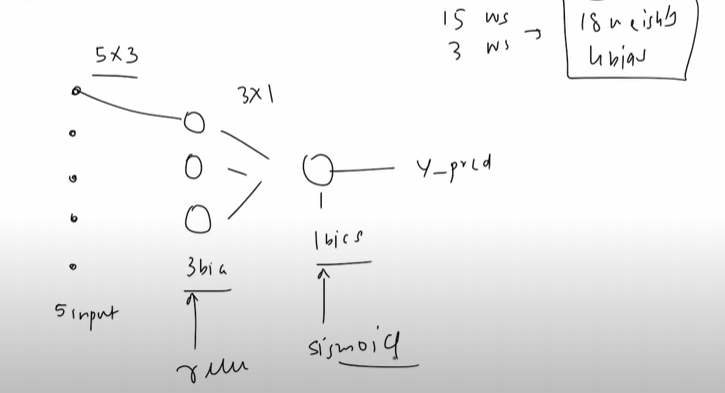

In [14]:
class Model(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.Linear1 = nn.Linear(num_features, 3)
        self.relu = nn.ReLU()
        self.Linear2 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.Linear1(features)
        out = self.relu(out)
        out = self.Linear2(out)
        out = self.sigmoid(out)
        return out

In [15]:
features = torch.rand(10,5)

model = Model(features.shape[1])
model(features)

tensor([[0.4086],
        [0.3712],
        [0.3899],
        [0.4134],
        [0.4201],
        [0.4266],
        [0.4405],
        [0.4237],
        [0.4831],
        [0.4419]], grad_fn=<SigmoidBackward0>)

In [16]:
from torchinfo import summary

summary(model, input_size=(10,5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

##### **Using Sequential Containers**- To minimize redundant Coding 

In [ ]:
class Model(nn.Module):

    def __init__(self, num_features):

        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, features):
        out = self.network(features)
        return out 
        

#### Example 

In [17]:
import numpy as np 
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.shape

(569, 33)

In [20]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [21]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

Numpy Arrays to Pytorch Tensors

In [25]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32)) 
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [26]:
X_train_tensor.shape

torch.Size([455, 30])

##### Defining the Model 

In [27]:
import torch.nn as nn

class Model(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
    
    def forward(self, features):
        out = self.network(features)
        return out

In [28]:
# Defining Loss Function
loss_function = nn.BCELoss()

### Training Pipeline

In [30]:
model = Model(X_train_tensor.shape[1])

# Defining the Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Defining the number of epochs
epochs = 25

for epoch in range(epochs):

    # Forward Pass
    y_pred = model(X_train_tensor)

    # Loss Calculate
    loss = loss_function(y_pred, y_train_tensor.view(-1,1))  # Reshape y_train_tensor to match the output shape of the model

    # Clearing the Gradients
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Parameters Update
    optimizer.step()

    # Print loss in each epoch
    print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

Epoch: 1, Loss: 0.6220
Epoch: 2, Loss: 0.6043
Epoch: 3, Loss: 0.5837
Epoch: 4, Loss: 0.5639
Epoch: 5, Loss: 0.5441
Epoch: 6, Loss: 0.5253
Epoch: 7, Loss: 0.5073
Epoch: 8, Loss: 0.4903
Epoch: 9, Loss: 0.4739
Epoch: 10, Loss: 0.4582
Epoch: 11, Loss: 0.4433
Epoch: 12, Loss: 0.4291
Epoch: 13, Loss: 0.4154
Epoch: 14, Loss: 0.4023
Epoch: 15, Loss: 0.3899
Epoch: 16, Loss: 0.3780
Epoch: 17, Loss: 0.3666
Epoch: 18, Loss: 0.3556
Epoch: 19, Loss: 0.3452
Epoch: 20, Loss: 0.3351
Epoch: 21, Loss: 0.3255
Epoch: 22, Loss: 0.3162
Epoch: 23, Loss: 0.3074
Epoch: 24, Loss: 0.2989
Epoch: 25, Loss: 0.2908
